In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import wrangle_mall as wm
from pydataset import data

import warnings
warnings.filterwarnings("ignore")

# 1. Clustering with the Iris Dataset 

- Using this lesson as a guide, perform clustering on the iris dataset.
- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [2]:
iris_df = data('iris')
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_df.shape

(150, 5)

In [4]:
train, validate, test = wm.train_val_test(iris_df)

train.shape, validate.shape, test.shape

((105, 5), (22, 5), (23, 5))

In [5]:
X = train[['Sepal.Length', 'Petal.Length']]

In [6]:
X.head()

,Sepal.Length,Petal.Length
89,5.6,4.1
114,5.7,5.0
105,6.5,5.8
5,5.0,1.4
72,6.1,4.0


In [7]:
kmeans = KMeans(n_clusters=3, random_state=22)

kmeans.fit(X)

kmeans.predict(X)


array([0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2], dtype=int32)

In [8]:
X['unscaled_clusters'] = kmeans.predict(X)
X.head()

,Sepal.Length,Petal.Length,unscaled_clusters
89,5.6,4.1,0
114,5.7,5.0,0
105,6.5,5.8,2
5,5.0,1.4,1
72,6.1,4.0,0


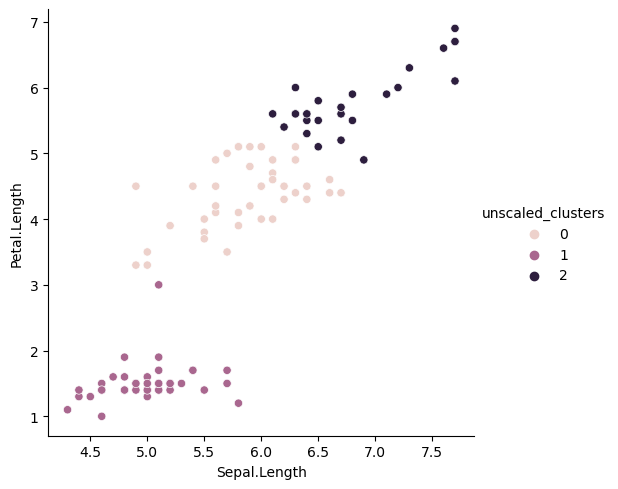

In [9]:
sns.relplot(data=X, x='Sepal.Length', y='Petal.Length', hue='unscaled_clusters')
plt.show()

In [10]:
mm_scaler = MinMaxScaler()

X[['Sepal.Length', 'Petal.Length']] = mm_scaler.fit_transform(X[['Sepal.Length', 'Petal.Length']])

X.head()

,Sepal.Length,Petal.Length,unscaled_clusters
89,0.382353,0.525424,0
114,0.411765,0.677966,0
105,0.647059,0.813559,2
5,0.205882,0.067797,1
72,0.529412,0.508475,0


In [11]:
kmeans_scale = KMeans(n_clusters=3, random_state = 22)

kmeans_scale.fit(X[['Sepal.Length', 'Petal.Length']])

KMeans(n_clusters=3, random_state=22)

In [12]:
kmeans_scale.predict(X[['Sepal.Length', 'Petal.Length']])

array([2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2,
       2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 1,
       1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0], dtype=int32)

In [13]:
X['scaled_clusters'] = kmeans_scale.predict(X[['Sepal.Length', 'Petal.Length']])

X.head()

,Sepal.Length,Petal.Length,unscaled_clusters,scaled_clusters
89,0.382353,0.525424,0,2
114,0.411765,0.677966,0,2
105,0.647059,0.813559,2,0
5,0.205882,0.067797,1,1
72,0.529412,0.508475,0,2


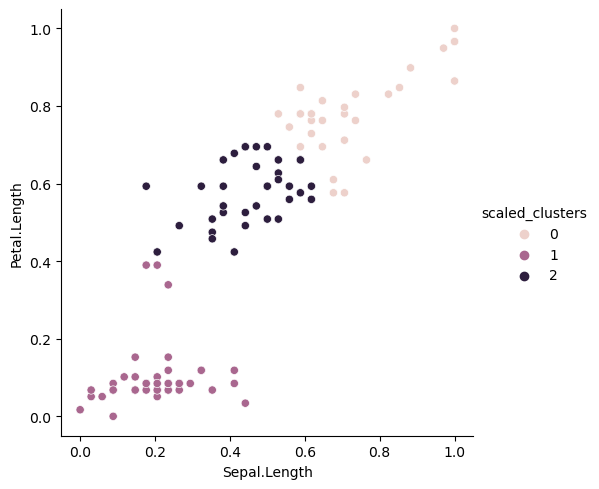

In [14]:
sns.relplot(data = X, x = 'Sepal.Length', y = 'Petal.Length', hue = 'scaled_clusters')
plt.show()

In [15]:
kmeans_scale.cluster_centers_

array([[0.72647059, 0.78587571],
       [0.20294118, 0.10169492],
       [0.4512605 , 0.57869249]])

In [16]:
kmeans_scale.inertia_

2.2744965064451512

In [17]:
inertia = []
seed = 22 

for n in range(1,11):
    
    kmeans = KMeans(n_clusters = n, random_state = seed)
    
    kmeans.fit(X[['Sepal.Length', 'Petal.Length']])
    
    inertia.append(kmeans.inertia_)
    
    
inertia    
    

[15.799137241458928,
 4.087963034830258,
 2.2744965064451512,
 1.4380933658843078,
 1.0978964848822734,
 0.8405370971983199,
 0.6983674399717212,
 0.5807417992106332,
 0.5086939313578627,
 0.4258741327215768]

In [18]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
                           'inertia': inertia})

results_df

,n_clusters,inertia
0,1,15.799137
1,2,4.087963
2,3,2.274497
3,4,1.438093
4,5,1.097896
5,6,0.840537
6,7,0.698367
7,8,0.580742
8,9,0.508694
9,10,0.425874


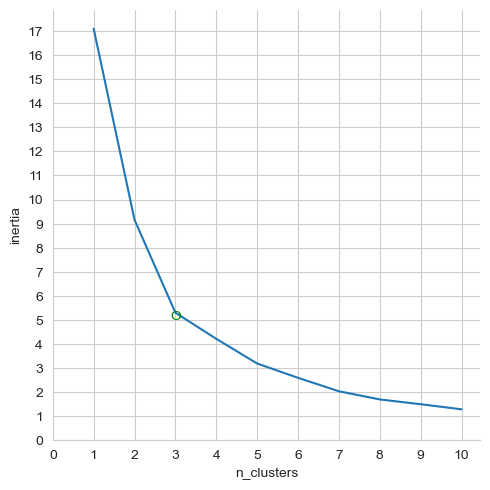

In [38]:
sns.set_style("whitegrid")
sns.relplot(data = results_df, x='n_clusters', y = 'inertia', kind = 'line')
plt.xticks(np.arange(0, 11, step=1))
plt.yticks(np.arange(0, 18, step=1))
point = (2.88, 5) # specify the x and y values of the point to annotate
plt.annotate("O", xy=point, c= 'green')
plt.show()

# 2. Use the techniques discussed in this lesson

- As well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. 
- Be sure to visualize your results!

In [20]:
df = wm.get_mall_data()
df.shape

(200, 5)

In [21]:
train, validate, test = wm.train_val_test(df)
train.shape, validate.shape, test.shape

((140, 5), (30, 5), (30, 5))

In [22]:
X = train[['age', 'annual_income']]

In [23]:
seed = 42

kmeans = KMeans(n_clusters=3, random_state= seed)

kmeans.fit(X)

kmeans.predict(X)

array([2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1,
       2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2,
       2, 0, 1, 2, 2, 1, 2, 1], dtype=int32)

In [24]:
X['unscaled_clusters'] = kmeans.predict(X)
X.head()

,age,annual_income,unscaled_clusters
197,32,126,2
2,20,16,0
54,50,43,1
118,51,67,1
181,32,97,2


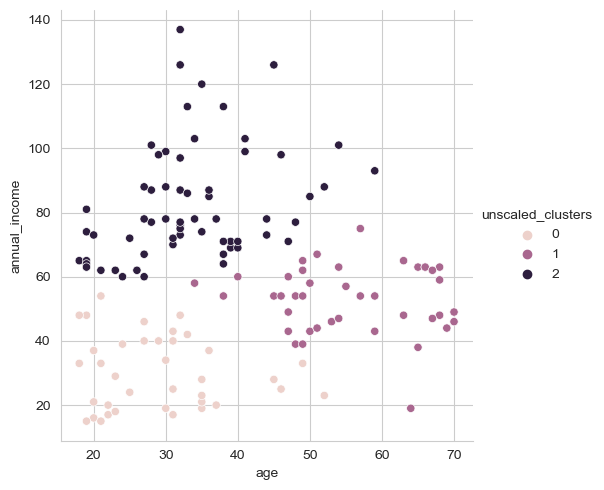

In [25]:
sns.relplot(data=X, x='age', y='annual_income', hue='unscaled_clusters')
plt.show()

In [26]:
mm_scaler = MinMaxScaler()

X[['age', 'annual_income']] = mm_scaler.fit_transform(X[['age', 'annual_income']])

X.head()

,age,annual_income,unscaled_clusters
197,0.269231,0.909836,2
2,0.038462,0.008197,0
54,0.615385,0.229508,1
118,0.634615,0.426230,1
181,0.269231,0.672131,2


In [27]:
kmeans_scale = KMeans(n_clusters=3, random_state=seed)

kmeans_scale.fit(X[['age', 'annual_income']])

KMeans(n_clusters=3, random_state=42)

In [28]:
kmeans_scale.predict(X[['age', 'annual_income']])

array([2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2,
       2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1,
       2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1,
       1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 1], dtype=int32)

In [29]:
X['scaled_clusters'] = kmeans_scale.predict(X[['age', 'annual_income']])

X.head()

,age,annual_income,unscaled_clusters,scaled_clusters
197,0.269231,0.909836,2,2
2,0.038462,0.008197,0,0
54,0.615385,0.229508,1,1
118,0.634615,0.426230,1,1
181,0.269231,0.672131,2,2


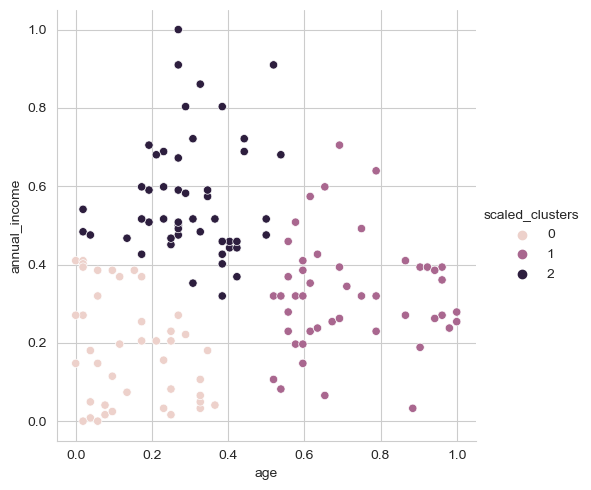

In [30]:
sns.relplot(data = X, x = 'age', y = 'annual_income', hue = 'scaled_clusters')
plt.show()

In [31]:
kmeans_scale.cluster_centers_

array([[0.14697802, 0.18384075],
       [0.7255609 , 0.32530738],
       [0.30038462, 0.56868852]])

In [32]:
kmeans_scale.inertia_

5.300633787229961

In [33]:
inertia = []
seed = 42 

for n in range(1,11):
    
    kmeans = KMeans(n_clusters = n, random_state = seed)
    
    kmeans.fit(X[['age', 'annual_income']])
    
    inertia.append(kmeans.inertia_)
    
    
inertia    

[17.09840071972195,
 9.157598138793384,
 5.300633787229961,
 4.2153162962907125,
 3.189700010142959,
 2.5962146010339695,
 2.037938722445505,
 1.6988782031048137,
 1.499929798779048,
 1.288606246633992]

In [34]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
                           'inertia': inertia})

results_df

,n_clusters,inertia
0,1,17.098401
1,2,9.157598
2,3,5.300634
3,4,4.215316
4,5,3.189700
5,6,2.596215
6,7,2.037939
7,8,1.698878
8,9,1.499930
9,10,1.288606


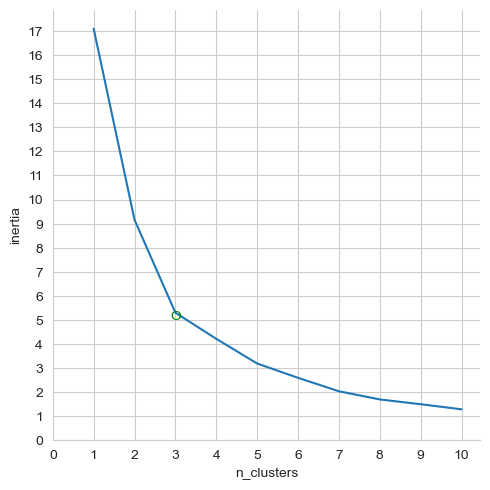

In [35]:
sns.set_style("whitegrid")
sns.relplot(data = results_df, x='n_clusters', y = 'inertia', kind = 'line')
plt.xticks(np.arange(0, 11, step=1))
plt.yticks(np.arange(0, 18, step=1))
point = (2.88, 5) # specify the x and y values of the point to annotate
plt.annotate("O", xy=point, c= 'green')
plt.show()

# 3. How does scaling impact the results of clustering?

- Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). 
- You can show how the resulting clusters differ either with descriptive statistics or visually.

In [36]:
# scaling impacts the results of clustering because certain data points 
# end up moving to different clusters according to their distance